<a href="https://colab.research.google.com/github/aymenhmid/NLP_Guide/blob/main/Transformers/Transformers.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

###  Introduction: The Transformer Architecture  



#### **1. Core Role of Transformers in NLP**  
- **Revolutionary Impact**: Transformers are the foundational architecture for modern **large language models (LLMs)**, replacing older sequential models (RNNs/LSTMs) and enabling breakthroughs in NLP.  
- **Key Innovation**: The **self-attention mechanism** allows the model to dynamically weigh relationships between all tokens in a sequence, overcoming limitations like sequential processing bottlenecks and poor long-range dependency handling.  

---

#### **2. Architecture Overview (Fig. 9.1)**  
The Transformer consists of three main components:  
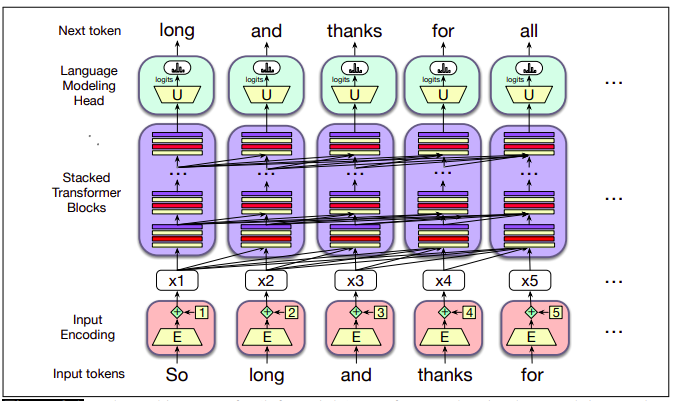
1. **Input Encoding**:  
   - **Token Embeddings**: Convert input tokens (e.g., words) into dense vectors using an embedding matrix \( E \).  
   - **Positional Encoding**: Adds positional information to embeddings (via sine/cosine functions or learned vectors) to retain word order, critical for non-recurrent models.  

2. **Stacked Transformer Blocks**:  
   - **Multi-Head Attention**: Processes input vectors in parallel across multiple "heads," each capturing different contextual relationships (e.g., syntactic vs. semantic).  
   - **Feedforward Networks**: Apply non-linear transformations to refine representations.  
   - **Layer Normalization**: Stabilizes training by normalizing activations.  
   - **Depth**: Blocks are stacked vertically (12–96+ layers), enabling hierarchical feature learning.  

3. **Language Modeling Head**:  
   - **Unembedding Matrix \( U \)**: Maps final hidden states to vocabulary logits.  
   - **Softmax**: Generates a probability distribution over the vocabulary to predict the next token (autoregressive modeling).  

---

#### **3. Autoregressive (Left-to-Right) Language Modeling**  
- **Objective**: Predict the next token \( w_t \) given prior context \( w_{1:t-1} \), ensuring predictions depend only on preceding tokens (*causal* attention).  
- **Process**:  
  1. Input tokens pass through embedding and positional encoding layers.  
  2. Transformer blocks iteratively refine contextual representations via self-attention and feedforward layers.  
  3. The language modeling head produces logits for the next token, trained using cross-entropy loss.  

---

#### **4. Advantages Over RNNs**  
- **Parallelization**: All tokens in a sequence are processed simultaneously (unlike sequential RNNs), enabling faster training.  
- **Global Context**: Self-attention captures dependencies across the entire sequence, improving performance on tasks requiring broad context (e.g., translation, summarization).  
- **Scalability**: Efficiently handles large datasets and long sequences, leveraging GPU/TPU hardware.  

---

#### **5. Broader Context and Future Chapters**  
- **Foundational for Modern NLP**: The Transformer sets the stage for:  
  - **Pretraining LLMs** (Chapter 10): Training models on vast text corpora.  
  - **Bidirectional Models (BERT)** (Chapter 11): Masked language modeling.  
  - **Prompting and Alignment** (Chapter 12): Instruction tuning and human preference alignment.  
  - **Encoder-Decoder Architectures** (Chapter 13): Machine translation and sequence-to-sequence tasks.  

---



### 9.1 : "Attention"



#### **1. Self-Attention Mechanism**  
- **Core Idea**: Self-attention computes **contextual representations** of tokens by dynamically weighting relationships between all pairs of tokens in a sequence.  
  - **Query, Key, Value (QKV)**: Each token is represented by three vectors:  
    - **Query**: Represents the token’s "question" about other tokens.  
    - **Key**: Represents what information the token "offers."  
    - **Value**: Contains the actual content to be aggregated.  
  - **Attention Score**: Measures the relevance of token \( j \) to token \( i \), computed as the dot product of \( Q_i \) and \( K_j \), scaled and normalized via softmax.  

#### **2. Multi-Head Attention**  
- **Parallel Attention Heads**:  
  - The input is split into multiple "heads," each performing independent self-attention.  
  - Captures diverse linguistic patterns (e.g., syntactic roles, semantic relationships).  
  - Outputs from all heads are concatenated and linearly transformed.  
- **Advantage**: Enables the model to focus on different aspects of context simultaneously.  

#### **3. Positional Encoding**  
- **Role**: Injects **positional information** into embeddings since Transformers lack inherent sequential processing.  
- **Methods**:  
  - **Sinusoidal Functions**: Predefined sine/cosine waves encode absolute positions.  
  - **Learned Embeddings**: Positional vectors learned during training.  

#### **4. Transformer Block Structure**  
Each block consists of:  
1. **Multi-Head Attention Layer**: Computes contextual relationships.  
2. **Feedforward Network (FFN)**: Applies non-linear transformations (e.g., ReLU).  
3. **Residual Connections & Layer Normalization**:  
   - Residual connections mitigate vanishing gradients by adding input to output.  
   - Layer normalization stabilizes training by standardizing activations.  

#### **5. Autoregressive Language Modeling**  
- **Causal Masking**: Ensures predictions for token \( t \) depend only on tokens \( 1:t-1 \) (left-to-right generation).  
- **Training Objective**: Maximize the likelihood of the next token given prior context.  

---

### **Connection to Broader Architecture**  
- **Stacked Blocks**: Transformers use **12–96+ stacked blocks**, enabling hierarchical learning of abstract features.  
- **Input Encoding → Transformer Blocks → Language Modeling Head**:  
  - **Input Encoding**: Tokens are embedded and combined with positional information.  
  - **Transformer Blocks**: Refine representations via attention and FFNs.  
  - **Language Modeling Head**: Maps final hidden states to vocabulary probabilities (via unembedding matrix \( U \) and softmax).  

---

### **Key Innovations & Impact**  
- **Replaces Recurrence**: Self-attention eliminates sequential processing, enabling **parallel computation** and scalability.  
- **Handles Long-Range Dependencies**: Direct token interactions bypass the limitations of RNNs/LSTMs.  
- **Foundation for LLMs**: The architecture underpins models like GPT (autoregressive) and BERT (bidirectional), revolutionizing tasks from translation to text generation.  

###  9.2: Transformer Blocks




1. **Structure**:  
   - Each block contains **multi-head attention** and **feedforward layers**, with **residual connections** and **layer normalization**.  
2. **Key Components**:  
   - **Multi-Head Attention**: Enables parallel focus on diverse contextual relationships.  
   - **Feedforward Networks (FFN)**: Apply non-linear transformations to refine token representations.  
   - **Residual Connections**: Stabilize training by preserving gradient flow.  
3. **Stacking**:  
   - Blocks are stacked (12–96+ layers) for hierarchical learning, with lower layers capturing local patterns and higher layers modeling global context.  
4. **Efficiency**:  
   - Parallel processing of tokens enables GPU/TPU acceleration, despite quadratic self-attention complexity.  

### 9.3 : Parallelizing Computation Using a Single Matrix X



#### **Key Idea**  
Transformers leverage **matrix parallelism** to optimize the computation of queries (Q), keys (K), and values (V) in self-attention. By combining these operations into a single matrix multiplication, the architecture achieves significant computational efficiency, particularly on GPUs/TPUs.

---

#### **Mechanism**  
1. **Combined Weight Matrix**:  
   - Instead of separate matrices \( W_Q, W_K, W_V \) for queries, keys, and values, these are concatenated into a **single matrix \( W \)**.  
   - For \( h \) attention heads and input dimension \( d_{\text{model}} \), \( W \) has dimensions \( d_{\text{model}} \times 3h d_k \), where \( d_k \) is the dimension per head.  

2. **Single Matrix Multiplication**:  
   - The input sequence matrix \( X \) (dimensions \( n \times d_{\text{model}} \), where \( n \) is sequence length) is multiplied by \( W \):  
     \[
     XW = [Q \, K \, V]
     \]  
   - The output is a combined matrix of size \( n \times 3h d_k \), which is split into \( Q, K, V \) matrices for all heads.  

3. **Reshaping for Multi-Head Attention**:  
   - Split \( Q, K, V \) into \( h \) heads, each of size \( n \times d_k \).  
   - Enables parallel computation of attention scores across all heads and tokens.  

---

#### **Advantages**  
- **Computational Efficiency**:  
  - Reduces three separate matrix multiplications (for \( Q, K, V \)) to one, minimizing GPU kernel launches and leveraging hardware acceleration.  
  - Critical for scaling to large models (e.g., GPT-3, BERT) with billions of parameters.  
- **Memory Optimization**:  
  - Reduces memory overhead by consolidating operations, improving cache utilization.  
- **Simplified Implementation**:  
  - Streamlines code by handling all attention-head computations in a unified operation.  

---

#### **Integration with Multi-Head Attention**  
- **Parallel Heads**:  
  - All heads compute attention in parallel, with no sequential dependency.  
  - Outputs are concatenated and linearly transformed to produce the final attention output.  
- **Complexity**:  
  - Despite the quadratic \( O(n^2) \) self-attention complexity, single-matrix operations reduce constants, making training feasible for long sequences.  

---

#### **Example Workflow**  
1. **Input**: Sequence matrix \( X \) (e.g., 10 tokens × 768 dimensions).  
2. **Single Matrix Multiply**:  
   - \( XW \) produces a 10 × 2304 matrix (assuming 12 heads, \( d_k = 64 \)).  
3. **Split**:  
   - Reshape into \( Q, K, V \), each of size 12 heads × 10 tokens × 64 dimensions.  
4. **Attention Computation**:  
   - Compute scaled dot-product attention for all heads in parallel.  

---

#### **Broader Impact**  
- **Scalability**: This optimization underpins the ability to train models with hundreds of layers and massive datasets.  
- **Foundation for Modern LLMs**: Efficient matrix operations are central to architectures like GPT-4, PaLM, and T5, enabling real-time applications (e.g., chatbots, translation).  

---

#### **Trade-offs**  
- **Memory Overhead**: Temporary storage of the combined \( QKV \) matrix increases memory usage, but this is offset by faster computation.  
- **Implementation Complexity**: Requires careful dimension management when splitting/reshaping tensors.  

### 9.4 Input Encoding: Token and Position Embeddings



#### **1. Purpose of Input Encoding**  
Transformers require input tokens to be converted into **continuous vector representations** that capture both **semantic meaning** (via token embeddings) and **positional information** (via positional encoding). Unlike RNNs, Transformers lack innate sequential processing, making explicit positional encoding critical.  

---

#### **2. Token Embeddings**  
- **Function**:  
  - Map discrete tokens (words, subwords) to dense vectors in a high-dimensional space (e.g., 768 dimensions).  
  - Learned during training via an **embedding matrix** \( E \), where each row corresponds to a token in the vocabulary.  
- **Example**:  
  - The token "apple" might be mapped to a vector like \([0.2, -0.5, 1.3, ...]\).  

---

#### **3. Positional Encoding**  
- **Role**: Injects **order information** into the model, enabling it to distinguish sequences like "dog bites man" vs. "man bites dog."  
- **Methods**:  
  1. **Sinusoidal Functions** (Original Transformer):  
     - Uses sine and cosine waves of varying frequencies:  
       \[
       PE_{(pos, 2i)} = \sin\left(\frac{pos}{10000^{2i/d_{\text{model}}}}\right)  
       \]  
       \[
       PE_{(pos, 2i+1)} = \cos\left(\frac{pos}{10000^{2i/d_{\text{model}}}}\right)  
       \]  
     - **Advantages**: Deterministic, generalizes to unseen sequence lengths.  
  2. **Learned Positional Embeddings** (BERT, GPT):  
     - Treat position indices as learnable parameters (similar to token embeddings).  
     - **Advantages**: Flexible, adapts to task-specific positional patterns.  

---

#### **4. Combining Token and Positional Information**  
- **Additive Integration**:  
  - Token embeddings \( E(w) \) and positional embeddings \( PE(pos) \) are summed:  
    \[
    x_i = E(w_i) + PE(i)  
    \]  
  - The combined vector \( x_i \) is fed into the Transformer blocks.  

---

#### **5. Key Innovations**  
- **Permutation Invariance Mitigation**: Without positional encoding, Transformers would treat "A B C" and "C B A" identically.  
- **Scalability**: Positional encoding allows processing sequences of arbitrary length, crucial for tasks like document summarization.  

---

#### **6. Impact on Model Performance**  
- **Critical for Context**: Positional encoding ensures the model understands word order, improving performance on tasks like translation and text generation.  
- **Adaptability**: Learned positional embeddings can capture domain-specific patterns (e.g., code structure in programming languages).  

---

### **Connection to Broader Architecture**  
- **Input Pipeline**: Token + positional embeddings form the **input layer** to Transformer blocks (Section 9.2).  
- **Foundation for Pretraining** (Chapter 10): Effective encoding enables models like GPT and BERT to learn rich contextual representations from vast text corpora.  
- **Bidirectional Models** (Chapter 11): Positional encoding allows bidirectional attention (e.g., BERT) to process context in all directions.  



###9.5 The Language Modeling Head



#### **1. Purpose of the Language Modeling Head**  
The language modeling head is the final component of a Transformer, responsible for converting the **contextualized hidden states** (output by the last Transformer block) into **probability distributions over the vocabulary**, enabling next-token prediction in autoregressive models like GPT.  

---

#### **2. Core Components**  
1. **Unembedding Matrix \( U \):**  
   - Maps the final hidden state \( h_n \) (dimension \( d_{\text{model}} \)) to logits over the vocabulary (dimension \( |V| \)).  
   - \( \text{Logits} = h_n \cdot U^T \), where \( U \) is often tied to the input embedding matrix \( E \) (weight tying) to reduce parameters and improve generalization.  

2. **Softmax Layer**:  
   - Converts logits into probabilities:  
     \[
     P(w_t | w_{1:t-1}) = \text{softmax}(\text{Logits}) = \frac{\exp(\text{Logits}_i)}{\sum_{j=1}^{|V|} \exp(\text{Logits}_j)}
     \]  
   - Ensures probabilities sum to 1 for valid next-token sampling.  

---

#### **3. Weight Tying**  
- **Embedding-Unembedding Tie**:  
  - \( U = E^T \) (the unembedding matrix is the transpose of the input embedding matrix).  
  - **Benefits**:  
    - Reduces model parameters (critical for large vocabularies).  
    - Aligns semantic spaces (input embeddings and output logits share representations).  

---

#### **4. Autoregressive Generation**  
- **Causal Masking**: Ensures predictions for position \( t \) depend only on tokens \( 1:t-1 \).  
- **Sampling Strategies**:  
  - **Greedy Decoding**: Selects the token with the highest probability.  
  - **Temperature Scaling**: Adjusts softmax sharpness (\( \text{softmax}(\text{Logits}/T) \)) to control randomness.  
  - **Top-k/Top-p Sampling**: Restricts sampling to high-probability tokens for diverse yet coherent outputs.  

---

#### **5. Efficiency Considerations**  
- **Large Vocabularies**:  
  - Techniques like **hierarchical softmax** or **adaptive softmax** reduce computational cost for vocabularies with 100k+ tokens.  
- **Batch Processing**:  
  - Parallel computation of logits across tokens in a sequence optimizes GPU/TPU utilization.  

---

#### **6. Role in Broader Architecture**  
- **End-to-End Pipeline**:  
  1. **Input Encoding**: Tokens → embeddings + positional encoding.  
  2. **Transformer Blocks**: Refine embeddings via self-attention.  
  3. **Language Modeling Head**: Final hidden states → vocabulary probabilities.  
- **Applications**:  
  - Text generation (e.g., GPT), machine translation, and masked language modeling (e.g., BERT).  

---

### **Key Takeaways**  
- The language modeling head bridges **contextual representations** (from Transformer blocks) to **actionable predictions**.  
- **Weight tying** between embeddings and unembeddings improves efficiency and model coherence.  
- Autoregressive sampling strategies balance creativity and coherence in text generation.  

---

### **Connection to Subsequent Chapters**  
- **Pretraining LLMs** (Chapter 10): The head is trained via cross-entropy loss on large corpora.  
- **Bidirectional Models** (Chapter 11): BERT uses a masked language modeling head for cloze tasks.  
- **Decoding Strategies** (Chapter 12): Techniques like beam search build on the head’s output probabilities.  

This section underscores how the language modeling head enables Transformers to generate human-like text, forming the basis for tasks like dialogue, translation, and summarization.

###Implementaion Example

In [1]:
"""
Building a Transformer Text Classifier from Scratch
==================================================

This project implements a simple transformer model for text classification using PyTorch.
We'll build each component of the transformer architecture step by step to understand
how it works under the hood.

Requirements:
- PyTorch
- NumPy
- tqdm
- scikit-learn (for dataset processing)

You can install these with: `pip install torch numpy tqdm scikit-learn`
"""

import math
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import numpy as np
from torch.utils.data import Dataset, DataLoader
from sklearn.datasets import fetch_20newsgroups
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from tqdm import tqdm

# Set random seeds for reproducibility
torch.manual_seed(42)
np.random.seed(42)

# Global parameters
MAX_SEQ_LEN = 128         # Maximum sequence length
VOCAB_SIZE = 10000        # Vocabulary size
EMB_SIZE = 128            # Embedding dimension
NUM_HEADS = 4             # Number of attention heads
FF_DIM = 512              # Feed-forward dimension
NUM_LAYERS = 2            # Number of transformer layers
DROPOUT_RATE = 0.1        # Dropout rate
BATCH_SIZE = 64           # Batch size
LEARNING_RATE = 0.001     # Learning rate
NUM_EPOCHS = 5            # Number of training epochs

In [2]:
#################################################
# STEP 1: Positional Encoding
#################################################

class PositionalEncoding(nn.Module):
    """
    Implements positional encoding as described in the 'Attention Is All You Need' paper.
    This encodes the position information of tokens in a sequence.
    """
    def __init__(self, d_model, max_len=MAX_SEQ_LEN):
        super(PositionalEncoding, self).__init__()

        # Create a positional encoding matrix of shape (max_len, d_model)
        pe = torch.zeros(max_len, d_model)

        # Create a tensor of positions
        position = torch.arange(0, max_len, dtype=torch.float).unsqueeze(1)

        # Create scaling factor for the different dimensions
        div_term = torch.exp(torch.arange(0, d_model, 2).float() * (-math.log(10000.0) / d_model))

        # Apply sin to even indices
        pe[:, 0::2] = torch.sin(position * div_term)

        # Apply cos to odd indices
        pe[:, 1::2] = torch.cos(position * div_term)

        # Add batch dimension and register as buffer (persistent state)
        pe = pe.unsqueeze(0)
        self.register_buffer('pe', pe)

    def forward(self, x):
        """
        Args:
            x: Input tensor of shape [batch_size, seq_len, d_model]
        Returns:
            Output tensor with positional encoding added
        """
        # Add positional encoding to the input embeddings
        x = x + self.pe[:, :x.size(1), :]
        return x

In [3]:
#################################################
# STEP 2: Multi-Head Attention
#################################################

class MultiHeadAttention(nn.Module):
    """
    Multi-head attention mechanism that allows the model to jointly attend to
    information from different representation subspaces.
    """
    def __init__(self, d_model, num_heads):
        super(MultiHeadAttention, self).__init__()
        assert d_model % num_heads == 0, "d_model must be divisible by num_heads"

        self.d_model = d_model
        self.num_heads = num_heads
        self.head_dim = d_model // num_heads

        # Linear projections for query, key, value, and output
        self.q_linear = nn.Linear(d_model, d_model)
        self.k_linear = nn.Linear(d_model, d_model)
        self.v_linear = nn.Linear(d_model, d_model)
        self.out = nn.Linear(d_model, d_model)

    def forward(self, q, k, v, mask=None):
        batch_size = q.size(0)

        # Apply linear projections and reshape for multi-head attention
        q = self.q_linear(q).view(batch_size, -1, self.num_heads, self.head_dim).transpose(1, 2)
        k = self.k_linear(k).view(batch_size, -1, self.num_heads, self.head_dim).transpose(1, 2)
        v = self.v_linear(v).view(batch_size, -1, self.num_heads, self.head_dim).transpose(1, 2)

        # Calculate attention scores
        scores = torch.matmul(q, k.transpose(-2, -1)) / math.sqrt(self.head_dim)

        # Apply mask if provided (used for padding or causal attention)
        if mask is not None:
            scores = scores.masked_fill(mask == 0, -1e9)

        # Apply softmax to get attention weights
        attention_weights = F.softmax(scores, dim=-1)

        # Apply attention weights to values
        out = torch.matmul(attention_weights, v)

        # Reshape and concatenate heads
        out = out.transpose(1, 2).contiguous().view(batch_size, -1, self.d_model)

        # Final linear projection
        return self.out(out)

In [4]:
#################################################
# STEP 3: Feed-Forward Network
#################################################

class FeedForwardNetwork(nn.Module):
    """
    Two-layer feed-forward network applied to each position separately and identically.
    """
    def __init__(self, d_model, d_ff):
        super(FeedForwardNetwork, self).__init__()
        self.linear1 = nn.Linear(d_model, d_ff)
        self.linear2 = nn.Linear(d_ff, d_model)

    def forward(self, x):
        # First linear layer followed by ReLU activation
        x = F.relu(self.linear1(x))

        # Second linear layer
        x = self.linear2(x)

        return x

In [5]:
#################################################
# STEP 4: Encoder Layer
#################################################

class EncoderLayer(nn.Module):
    """
    One layer of the encoder consisting of multi-head attention and feed-forward network
    with residual connections and layer normalization.
    """
    def __init__(self, d_model, num_heads, d_ff, dropout):
        super(EncoderLayer, self).__init__()

        self.self_attention = MultiHeadAttention(d_model, num_heads)
        self.feed_forward = FeedForwardNetwork(d_model, d_ff)
        self.norm1 = nn.LayerNorm(d_model)
        self.norm2 = nn.LayerNorm(d_model)
        self.dropout = nn.Dropout(dropout)

    def forward(self, x, mask=None):
        # Multi-head self-attention with residual connection and layer norm
        attn_output = self.self_attention(x, x, x, mask)
        x = self.norm1(x + self.dropout(attn_output))

        # Feed-forward network with residual connection and layer norm
        ff_output = self.feed_forward(x)
        x = self.norm2(x + self.dropout(ff_output))

        return x

In [6]:
#################################################
# STEP 5: Complete Transformer Encoder
#################################################

class TransformerEncoder(nn.Module):
    """
    Complete transformer encoder consisting of embedding layer,
    positional encoding, and multiple encoder layers.
    """
    def __init__(self, vocab_size, d_model, num_heads, d_ff, num_layers, max_seq_len, dropout, num_classes):
        super(TransformerEncoder, self).__init__()

        # Embedding layer to convert token IDs to vectors
        self.embedding = nn.Embedding(vocab_size, d_model)

        # Positional encoding to add position information
        self.positional_encoding = PositionalEncoding(d_model, max_seq_len)

        # Dropout layer
        self.dropout = nn.Dropout(dropout)

        # Multiple encoder layers
        self.encoder_layers = nn.ModuleList([
            EncoderLayer(d_model, num_heads, d_ff, dropout)
            for _ in range(num_layers)
        ])

        # Final layer normalization
        self.layer_norm = nn.LayerNorm(d_model)

        # Classification head
        self.classifier = nn.Linear(d_model, num_classes)

    def forward(self, x, mask=None):
        # Convert token IDs to embeddings
        x = self.embedding(x) * math.sqrt(self.embedding.embedding_dim)

        # Add positional encoding
        x = self.positional_encoding(x)

        # Apply dropout
        x = self.dropout(x)

        # Pass through encoder layers
        for encoder_layer in self.encoder_layers:
            x = encoder_layer(x, mask)

        # Apply final layer normalization
        x = self.layer_norm(x)

        # Global average pooling for classification
        x = x.mean(dim=1)

        # Classification head
        logits = self.classifier(x)

        return logits

In [7]:
#################################################
# STEP 6: Data Preparation
#################################################

class TextClassificationDataset(Dataset):
    """
    Dataset for text classification using the transformer model.
    """
    def __init__(self, texts, labels, vocab_size=VOCAB_SIZE, max_seq_len=MAX_SEQ_LEN):
        self.texts = texts
        self.labels = labels
        self.vocab_size = vocab_size
        self.max_seq_len = max_seq_len

        # Create a simple tokenizer (in a real application, use a proper tokenizer)
        self.word_to_idx = {'<PAD>': 0, '<UNK>': 1}
        self._build_vocab()

    def _build_vocab(self):
        """Build a simple vocabulary from the training texts."""
        word_freq = {}

        # Count word frequencies
        for text in self.texts:
            for word in text.lower().split():
                if word not in word_freq:
                    word_freq[word] = 0
                word_freq[word] += 1

        # Sort words by frequency and take the top vocab_size - 2 words
        # (-2 because we already have <PAD> and <UNK>)
        sorted_words = sorted(word_freq.items(), key=lambda x: x[1], reverse=True)
        for i, (word, _) in enumerate(sorted_words[:self.vocab_size - 2]):
            self.word_to_idx[word] = i + 2

    def _tokenize(self, text):
        """Convert text to a sequence of token IDs."""
        tokens = []
        for word in text.lower().split()[:self.max_seq_len]:
            tokens.append(self.word_to_idx.get(word, self.word_to_idx['<UNK>']))

        # Pad or truncate to max_seq_len
        if len(tokens) < self.max_seq_len:
            tokens += [self.word_to_idx['<PAD>']] * (self.max_seq_len - len(tokens))
        else:
            tokens = tokens[:self.max_seq_len]

        return tokens

    def __len__(self):
        return len(self.texts)

    def __getitem__(self, idx):
        text = self.texts[idx]
        label = self.labels[idx]

        # Convert text to token IDs
        tokens = self._tokenize(text)

        return {
            'input_ids': torch.tensor(tokens, dtype=torch.long),
            'label': torch.tensor(label, dtype=torch.long)
        }

def prepare_data():
    """Prepare the 20 Newsgroups dataset for text classification."""
    # Load dataset
    print("Loading 20 Newsgroups dataset...")
    newsgroups = fetch_20newsgroups(subset='all', remove=('headers', 'footers', 'quotes'))

    # Split into train/val/test
    X_train, X_test, y_train, y_test = train_test_split(
        newsgroups.data, newsgroups.target, test_size=0.2, random_state=42
    )
    X_train, X_val, y_train, y_val = train_test_split(
        X_train, y_train, test_size=0.1, random_state=42
    )

    # Create datasets
    train_dataset = TextClassificationDataset(X_train, y_train)
    val_dataset = TextClassificationDataset(X_val, y_val)
    test_dataset = TextClassificationDataset(X_test, y_test)

    # Create data loaders
    train_loader = DataLoader(train_dataset, batch_size=BATCH_SIZE, shuffle=True)
    val_loader = DataLoader(val_dataset, batch_size=BATCH_SIZE)
    test_loader = DataLoader(test_dataset, batch_size=BATCH_SIZE)

    # Get the number of classes
    num_classes = len(set(newsgroups.target))

    return train_loader, val_loader, test_loader, num_classes

In [8]:
#################################################
# STEP 7: Training and Evaluation
#################################################

def train(model, train_loader, val_loader, criterion, optimizer, num_epochs):
    """Train the transformer model."""
    device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
    print(f"Training on {device}")

    model.to(device)

    best_val_acc = 0.0

    for epoch in range(num_epochs):
        # Training phase
        model.train()
        train_loss = 0.0
        train_correct = 0
        train_total = 0

        progress_bar = tqdm(train_loader, desc=f"Epoch {epoch+1}/{num_epochs} [Train]")
        for batch in progress_bar:
            input_ids = batch['input_ids'].to(device)
            labels = batch['label'].to(device)

            # Forward pass
            outputs = model(input_ids)
            loss = criterion(outputs, labels)

            # Backward pass and optimization
            optimizer.zero_grad()
            loss.backward()
            optimizer.step()

            # Calculate accuracy
            _, predicted = torch.max(outputs.data, 1)
            train_total += labels.size(0)
            train_correct += (predicted == labels).sum().item()

            # Update average loss
            train_loss += loss.item()

            # Update progress bar
            progress_bar.set_postfix({
                'loss': f"{train_loss / (progress_bar.n + 1):.4f}",
                'acc': f"{100 * train_correct / train_total:.2f}%"
            })

        train_acc = 100 * train_correct / train_total
        train_loss /= len(train_loader)

        # Validation phase
        model.eval()
        val_loss = 0.0
        val_correct = 0
        val_total = 0

        with torch.no_grad():
            progress_bar = tqdm(val_loader, desc=f"Epoch {epoch+1}/{num_epochs} [Val]")
            for batch in progress_bar:
                input_ids = batch['input_ids'].to(device)
                labels = batch['label'].to(device)

                # Forward pass
                outputs = model(input_ids)
                loss = criterion(outputs, labels)

                # Calculate accuracy
                _, predicted = torch.max(outputs.data, 1)
                val_total += labels.size(0)
                val_correct += (predicted == labels).sum().item()

                # Update average loss
                val_loss += loss.item()

                # Update progress bar
                progress_bar.set_postfix({
                    'loss': f"{val_loss / (progress_bar.n + 1):.4f}",
                    'acc': f"{100 * val_correct / val_total:.2f}%"
                })

        val_acc = 100 * val_correct / val_total
        val_loss /= len(val_loader)

        print(f"Epoch {epoch+1}/{num_epochs}:")
        print(f"  Train Loss: {train_loss:.4f}, Train Acc: {train_acc:.2f}%")
        print(f"  Val Loss: {val_loss:.4f}, Val Acc: {val_acc:.2f}%")

        # Save the best model
        if val_acc > best_val_acc:
            best_val_acc = val_acc
            torch.save(model.state_dict(), "best_transformer_model.pth")
            print(f"  New best model saved with validation accuracy: {val_acc:.2f}%")

    print(f"Training completed. Best validation accuracy: {best_val_acc:.2f}%")

def evaluate(model, test_loader):
    """Evaluate the transformer model on the test set."""
    device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

    model.to(device)
    model.eval()

    test_correct = 0
    test_total = 0

    with torch.no_grad():
        progress_bar = tqdm(test_loader, desc="Testing")
        for batch in progress_bar:
            input_ids = batch['input_ids'].to(device)
            labels = batch['label'].to(device)

            # Forward pass
            outputs = model(input_ids)

            # Calculate accuracy
            _, predicted = torch.max(outputs.data, 1)
            test_total += labels.size(0)
            test_correct += (predicted == labels).sum().item()

            # Update progress bar
            progress_bar.set_postfix({
                'acc': f"{100 * test_correct / test_total:.2f}%"
            })

    test_acc = 100 * test_correct / test_total
    print(f"Test Accuracy: {test_acc:.2f}%")

In [9]:
#################################################
# STEP 8: Main Function
#################################################

def main():
    print("Starting Transformer Text Classification project...")

    # Prepare data
    train_loader, val_loader, test_loader, num_classes = prepare_data()

    print(f"Number of classes: {num_classes}")

    # Initialize model
    model = TransformerEncoder(
        vocab_size=VOCAB_SIZE,
        d_model=EMB_SIZE,
        num_heads=NUM_HEADS,
        d_ff=FF_DIM,
        num_layers=NUM_LAYERS,
        max_seq_len=MAX_SEQ_LEN,
        dropout=DROPOUT_RATE,
        num_classes=num_classes
    )

    # Define loss function and optimizer
    criterion = nn.CrossEntropyLoss()
    optimizer = optim.Adam(model.parameters(), lr=LEARNING_RATE)

    # Print model summary
    print("Model Architecture:")
    print(model)
    print(f"Total parameters: {sum(p.numel() for p in model.parameters())}")

    # Train model
    train(model, train_loader, val_loader, criterion, optimizer, NUM_EPOCHS)

    # Load best model
    model.load_state_dict(torch.load("best_transformer_model.pth"))

    # Evaluate on test set
    evaluate(model, test_loader)

if __name__ == "__main__":
    main()

Starting Transformer Text Classification project...
Loading 20 Newsgroups dataset...
Number of classes: 20
Model Architecture:
TransformerEncoder(
  (embedding): Embedding(10000, 128)
  (positional_encoding): PositionalEncoding()
  (dropout): Dropout(p=0.1, inplace=False)
  (encoder_layers): ModuleList(
    (0-1): 2 x EncoderLayer(
      (self_attention): MultiHeadAttention(
        (q_linear): Linear(in_features=128, out_features=128, bias=True)
        (k_linear): Linear(in_features=128, out_features=128, bias=True)
        (v_linear): Linear(in_features=128, out_features=128, bias=True)
        (out): Linear(in_features=128, out_features=128, bias=True)
      )
      (feed_forward): FeedForwardNetwork(
        (linear1): Linear(in_features=128, out_features=512, bias=True)
        (linear2): Linear(in_features=512, out_features=128, bias=True)
      )
      (norm1): LayerNorm((128,), eps=1e-05, elementwise_affine=True)
      (norm2): LayerNorm((128,), eps=1e-05, elementwise_affine=T

Epoch 1/5 [Val]: 100%|██████████| 24/24 [00:06<00:00,  3.45it/s, loss=3.1616, acc=7.82%]


Epoch 1/5:
  Train Loss: 2.7931, Train Acc: 13.86%
  Val Loss: 3.1616, Val Acc: 7.82%
  New best model saved with validation accuracy: 7.82%


Epoch 2/5 [Val]: 100%|██████████| 24/24 [00:06<00:00,  3.77it/s, loss=3.6187, acc=6.90%]


Epoch 2/5:
  Train Loss: 2.3251, Train Acc: 27.53%
  Val Loss: 3.6187, Val Acc: 6.90%


Epoch 3/5 [Val]: 100%|██████████| 24/24 [00:07<00:00,  3.33it/s, loss=3.8898, acc=7.43%]


Epoch 3/5:
  Train Loss: 2.0080, Train Acc: 37.10%
  Val Loss: 3.8898, Val Acc: 7.43%


Epoch 4/5 [Val]: 100%|██████████| 24/24 [00:06<00:00,  3.52it/s, loss=4.1555, acc=7.56%]


Epoch 4/5:
  Train Loss: 1.7715, Train Acc: 44.64%
  Val Loss: 4.1555, Val Acc: 7.56%


Epoch 5/5 [Val]: 100%|██████████| 24/24 [00:06<00:00,  3.59it/s, loss=4.2919, acc=7.16%]


Epoch 5/5:
  Train Loss: 1.5932, Train Acc: 50.35%
  Val Loss: 4.2919, Val Acc: 7.16%
Training completed. Best validation accuracy: 7.82%


Testing: 100%|██████████| 59/59 [00:17<00:00,  3.43it/s, acc=7.69%]

Test Accuracy: 7.69%
